#### Тестовое задание: Парсинг и анализ данных
##### Описание задачи:   
Компания рассматривает возможность анализа рынка с помощью данных, собранных с веб-страниц конкурентов. На сайтах конкурентов размещена информация о товарах в различных категориях, включая название, цену, описание, рейтинг, количество отзывов и наличие акций или скидок. В рамках этого задания вам предлагается провести анализ на основе данных о тонерах для жирной и нормальной кожи.
  
##### Цель задания:
Собрать и проанализировать данные о тонерах для жирной и нормальной кожи, выбрав от 4 до 8 брендов, чтобы сформировать отчет, который поможет компании понять позиционирование и ассортимент конкурентов.

##### Задание:
1.	**Парсинг данных с сайтов конкурентов**  
 o	Используя Python и библиотеку BeautifulSoup или Scrapy, спарсите следующие данные по тонерам для жирной и нормальной кожи:
  -	Название товара
  -	Цена
  -	Описание или основные характеристики товара
  -	Рейтинг (в виде звезд или баллов, если доступен)
  -	Количество отзывов
  -	Скидка или акция (если указана)
2.	**Анализ данных**  
 o	Проведите анализ собранных данных, включающий:
  - **Анализ цен**: Определите среднюю, минимальную и максимальную цену для тонеров в категории. Укажите бренды, предлагающие продукцию в премиальном и бюджетном сегментах.
  -	**Популярные характеристики**: Используя текстовый анализ, определите наиболее часто встречающиеся ключевые слова или фразы в описаниях тонеров (например, «матирующий», «увлажнение», «контроль блеска», «без спирта»).
  - **Анализ скидок**: Рассчитайте долю товаров со скидкой и средний процент скидки по категории, отметив бренды, которые чаще всего предлагают скидки.
  - **Анализ популярности**: Оцените популярность товаров на основе количества отзывов и рейтинга, чтобы определить наиболее популярные бренды и продукты.
3.	**Подготовка отчета**  
o	Сформируйте отчет с выводами, включив:
  - Краткий обзор ценовых сегментов и позиционирования брендов в категории тонеров для жирной и нормальной кожи.
  - Ключевые характеристики, часто встречающиеся в описаниях товаров.
  - Общую картину по скидкам и акциям среди тонеров.
  - Популярные бренды и товары по количеству отзывов и рейтингу.
4.	**Рекомендации**  
o	В конце отчета дайте рекомендации на основе анализа, например:
  - Какие ценовые сегменты и характеристики могут быть востребованы в сегменте тонеров для жирной и нормальной кожи?
  - Какие особенности продуктов стоит учитывать при разработке аналогичной продукции?
  - Какой подход к скидкам и акциям может помочь повысить конкурентоспособность?

##### Ожидания по результату:
1.	**Код парсинга**:  
o	Четкий и структурированный код, который собирает и обрабатывает данные по выбранным брендам, с комментариями к этапам парсинга и обработки данных.
2.	**Отчет по анализу данных**:  
o	Понятная структура отчета, содержащая четкие выводы по каждому разделу анализа.
3.	**Рекомендации**:  
o	Краткие и обоснованные рекомендации на основе полученных данных.
4.	**Гибкость и внимание к деталям**:  
o	Приветствуется, если кандидат выявит дополнительные важные аспекты или данные для анализа.


#### Выполнение задания

Условия задания и требования к отчету предполагают необходимость проведения общего обзора рынка конкретного товарного сегмента на основе собранных данных. Поскольку сегмент включает сотни брендов, выбор 4–8 из них без дополнительных критериев представляется затруднительным.  
Поэтому в качестве обоснованного подхода принято решение использовать данные, собранные с сайта мультибрендового интернет-магазина L'Etoile. Эти данные будут обработаны, разделены на сегменты и проанализированы, что позволит получить представление о рынке.  
Такой подход обладает гибкостью и масштабируемостью, так как может быть применен к любому количеству других сайтов для расширения базы данных и углубления анализа.

In [1]:
# Блок стандартных библиотек
import os
import platform
import sys
import time
from typing import List, Dict, Tuple, Union

# Блок сторонних библиотек для работы с данными
import numpy as np
import pandas as pd

# Блок библиотек для веб-скрапинга
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.common.exceptions import WebDriverException
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Блок библиотек для обработки текста
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize, ngrams
from collections import Counter
import pymorphy2
#from rapidfuzz import process

# Блок библиотек для визуализации данных
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

# Загрузка необходимых ресурсов для nltk
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True);

In [2]:
def get_environment_info() -> None:
    """
    Выводит информацию о среде выполнения, включая операционную систему, архитектуру машины и версию Python.
    """
    info = {
        "Операционная система": platform.system(),
        "Версия ОС": platform.version(),
        "Архитектура": platform.machine(),
        "Версия Python": platform.python_version(),
        "Реализация на Python": platform.python_implementation(),
        "Окружение": "VS Code" if "VSCODE_PID" in os.environ else "Unknown"
    }
    for key, value in info.items():
        print(f"{key}: {value}")


def display_statistics(data: pd.DataFrame) -> pd.DataFrame:
    """
    Выводит базовую статистику для каждого столбца в датафрейме.

    Параметры:
    data (pd.DataFrame): Датафрейм для анализа.

    Возвращает:
    pd.DataFrame: Датафрейм с характеристиками каждого столбца.
    """
    indicators: List[Dict] = []

    for col in data.columns:
        indicators.append({
            'type': data[col].dtypes,
            'types': set(map(lambda v: type(v).__name__, data[col].unique())),
            'count': data[col].count(),
            'NaNs': data[col].isna().sum(),
            'zero_values': data[col].eq(0).sum(),
            'nunique': data[col].nunique(),
            'unique-top5': data[col].value_counts().head().to_dict()
        })

    return pd.DataFrame(indicators, index=[x for x in data.columns])


def check_driver(target_url: str) -> None:
    """
    Проверяет работу Selenium WebDriver для указанного URL.

    Параметры:
    target_url (str): URL для загрузки.
    """
    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_argument("--headless")

    try:
        driver = webdriver.Chrome(options=chrome_options)
        driver.get(target_url)
        print("Заголовок страницы:", driver.title)
        driver.quit()
        print("webdriver.Chrome() работает корректно в headless режиме.")
    except WebDriverException as e:
        print("webdriver.Chrome() не установлен или не найден в PATH.", e)


def get_text_or_na(element, selector_info, strip: bool = True):
    """
    Возвращает текст элемента по селектору или np.nan, если элемент не найден.

    Если передан кортеж (selector, next_sibling=True), возвращает текст соседнего элемента.

    Параметры:
    element: HTML-элемент для поиска.
    selector_info: Строка селектора или кортеж (селектор, next_sibling).
    strip (bool): Удалять ли пробелы из текста. По умолчанию True.

    Возвращает:
    str | float: Текст элемента или np.nan, если элемент не найден.
    """
    if isinstance(selector_info, str):
        selector = selector_info
        next_sibling = False
    else:
        selector, next_sibling = selector_info

    found_element = element.select_one(selector)

    if not found_element:
        return np.nan

    if next_sibling:
        sibling_text = found_element.find_next_sibling(string=True)
        return sibling_text.strip() if sibling_text else np.nan

    return found_element.get_text(strip=strip)


def to_int(price: str | int | float | None) -> int | float | None:
    """
    Конвертирует значение цены в целое число.

    Параметры:
    price (str | int | float | None): Значение цены для обработки.

    Возвращает:
    int | float | None: Конвертированное значение или None, если обработка невозможна.
    """
    if price is None or (isinstance(price, float) and np.isnan(price)):
        return price

    if isinstance(price, (int, float)):
        return int(price)

    price = str(price).replace('\xa0', '').replace('₽', '').strip()
    return int(price)


def to_int_reviews(reviews: str | int) -> int:
    """
    Конвертирует значение количества отзывов в целое число.

    Параметры:
    reviews (str | int): Значение отзывов для обработки.

    Возвращает:
    int: Количество отзывов в целочисленном формате.
    """
    if isinstance(reviews, int) and np.isnan(reviews):
        return reviews

    if isinstance(reviews, str) and reviews == 'Нет отзывов':
        return 0

    return int(reviews)

print('Среда выполнения:\n')
get_environment_info()


Среда выполнения:

Операционная система: Windows
Версия ОС: 10.0.22631
Архитектура: AMD64
Версия Python: 3.10.0rc2
Реализация на Python: CPython
Окружение: VS Code


#### 1.	Парсинг данных с сайтов конкурентов

Целевой сайт имеет простую систему адресации и прозрачную иерархию CSS-классов.  
Поэтому достаточно составить набор констант и словарей для работы со страницами.

In [3]:
# Основной домен сайта
BASE_URL = 'https://www.letu.ru'

# Категория товаров
CATEGORY_SKINCARE = '/browse/uhod-za-kozhei'

# Подкатегории товаров по иерархии
SUBCATEGORY_FACE_CARE = '/sredstva-dlya-uhoda-za-litsom'
SUBCATEGORY_FACE_SKINCARE = '/uhod-za-kozhei-litsa'
SUBCATEGORY_TONERS = '/tonery-dlya-litsa'

# Фильтры, применяемые к результатам поиска
FILTER_TONER_PRODUCT_CLASS = '/filters/product-class=toner-dlya-litsa'

# Построение полного URL для целевой страницы с фильтрами
target_url = (
    f"{BASE_URL}"
    f"{CATEGORY_SKINCARE}"
    f"{SUBCATEGORY_FACE_CARE}"
    f"{SUBCATEGORY_FACE_SKINCARE}"
    f"{SUBCATEGORY_TONERS}"
    f"{FILTER_TONER_PRODUCT_CLASS}"
)

# Константы для классов
RESULTS_CONTAINER = "div.products-group-content"
TARGET_ELEMENT = f"{RESULTS_CONTAINER} .results-listing-content"
PRODUCT_CARD = ".product-tile"

# Словарь с ключами и селекторами (next_sibling указывается только для нужных полей)
selectors = {
    "Название": ".product-tile-name__text--brand",
    "Описание": "[data-at-product-tile-title]",
    "Цена": ".product-tile-price__text--actual",
    "Старая цена": ".product-tile-price__text--old",
    "Скидка": ".product-tile-price__text--discount",
    "Отзывов": ".product-tile__wrapper--rating span",
    "Объем": ".product-tile-variants__item",
    "Единица измерения": (".product-tile-variants__item", True)  # Для этого поля будет взят текст следующего элемента
}

NUMBER_OF_PAGES = 23

Самый лучший вариант сбора данных - API-интерфейс, но по заданию нужно провести парсинг страниц.  
Так как наполнение контента производится динамически (JS), BeautifulSoup будет недостаточно. 
Воспользуемся средствами библиотеки для автоматизации веб-браузеров selenium.  
Будем эмулировать запросы браузера Chrome в headless mode.

In [4]:
check_driver(target_url)

Заголовок страницы: L'Etoile
webdriver.Chrome() работает корректно в headless режиме.


"Перелистываем страницы" в цикле, наполняя данными словарь product_data, который преобразуем в pandas DataFrame для последующего анализа.

In [5]:
# Настройки Chrome WebDriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--headless")
driver = webdriver.Chrome(options=chrome_options)

products_data = []

try:
    for i in range(1, NUMBER_OF_PAGES):
        url = target_url if i == 1 else f"{target_url}/page-{i+1}"
        driver.get(url)

        # Ожидание, пока элемент страницы станет доступен
        WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, TARGET_ELEMENT))
        )

        # Парсинг страницы с помощью BeautifulSoup
        soup = BeautifulSoup(driver.page_source, "html.parser")
        results_listing = soup.select_one(TARGET_ELEMENT)

        if results_listing:
            product_cards = results_listing.select(PRODUCT_CARD)

            for product in product_cards:
                # Извлечение данных о продукте
                product_info = {key: get_text_or_na(product, selector) for key, selector in selectors.items()}
                products_data.append(product_info)

finally:
    driver.quit()

# Создание DataFrame из собранных данных
df = pd.DataFrame(products_data)
df.head()

,Название,Описание,Цена,Старая цена,Скидка,Отзывов,Объем,Единица измерения
0,ARAVIA PROFESSIONAL,Тонер с салициловой кислотой Sebum Free Toner,349 ₽,622 ₽,-44%,799,150,мл
1,ARAVIA PROFESSIONAL,Тонер омолаживающий с ниацинамидом Anti-Age Toner,356 ₽,622 ₽,-43%,765,150,мл
2,KUNDAL,"Тонер для лица с центеллой азиатской, пантенол...",1 899 ₽,NaN,NaN,134,200,мл
3,ARAVIA PROFESSIONAL,Спрей увлажняющий с гиалуроновой кислотой Aqua...,498 ₽,622 ₽,-20%,285,150,мл
4,KUNDAL,Тонер для лица успокаивающий с полынью Mugwort...,1 619 ₽,2 699 ₽,-40%,32,NaN,NaN


In [6]:
# Сохраним данные в формате parquet
df.to_parquet('parse.parquet')

Данные требуют преобразования типов.  
Преобразуем строки в числа, пересчитаем скидки.  
  
На этом этапе произведем разбиение на сегменты. Разбиение только на два сегмента слишком упростит картину. Как покажет дальнейший анализ, сегменты очень отличаются по масштабу цен и по присутствию в них брендов. Разделим данные на три сегмента по количеству товаров (можно разбить и на большее количество).

In [7]:
# Преобразование столбца 'Цена' в целочисленный формат
df['Цена'] = df['Цена'].apply(to_int)  

# Преобразование столбца 'Старая цена' в целочисленный формат
df['Старая цена'] = df['Старая цена'].apply(to_int)  

# Вычисление скидки как доли от старой цены
df['Скидка'] = round(1 - df['Цена'] / df['Старая цена'], 2)  

# Преобразование столбца 'Отзывов' в целочисленный формат
df['Отзывов'] = df['Отзывов'].apply(to_int_reviews)

# Разделение на ценовые сегменты
df['Сегмент'] = pd.qcut(df['Цена'], q=3, labels=['Бюджетный', 'Среднеценовой', 'Премиальный'])

# Отображение статистики по датафрейму
display_statistics(df)

,type,types,count,NaNs,zero_values,nunique,unique-top5
Название,object,{str},772,0,0,258,"{'ECOBRANCH': 30, 'GRACE DAY': 25, 'LEBELAGE':..."
Описание,object,{str},772,0,0,755,"{'Тонер для лица увлажняющий': 6, 'Тонер для л..."
Цена,float64,{float64},444,328,0,318,"{387.0: 6, 2390.0: 6, 780.0: 5, 499.0: 5, 510...."
Старая цена,float64,{float64},423,349,0,288,"{658.0: 6, 1790.0: 6, 780.0: 6, 1350.0: 6, 179..."
Скидка,float64,{float64},423,349,0,53,"{0.25: 62, 0.1: 39, 0.4: 32, 0.23: 21, 0.2: 21}"
Отзывов,int64,{int64},772,0,310,63,"{0: 310, 1: 90, 2: 51, 4: 37, 3: 36}"
Объем,object,"{str, float}",400,372,0,42,"{'150': 100, '200': 76, '100': 40, '250': 37, ..."
Единица измерения,object,"{str, float}",400,372,0,3,"{'мл': 386, 'шт': 9, 'гр': 5}"
Сегмент,category,"{str, float}",444,328,0,3,"{'Бюджетный': 152, 'Премиальный': 147, 'Средне..."


Статистика датасета показывает, что из ~ 800 строк более трети содержат пропущенные данные. Это связано с тем, что в интернет-магазинах снятые с продажи товары остаются в каталоге, но цены на них отсутствуют. Для проведения анализа, в том числе текстового, нам нужны все данные, поэтому ничего удалять не будем.  
Статистика показывает, что у более половины товаров есть инормация о ценах и количестве отзывов, что является представительной выборкой.  
Описание товара для текстового анализа присутствует во всех строках.

#### 2.	Анализ данных

##### 2.1.	Анализ цен
Построим распределение цен по категориям товаров с расчетом базовых статистик: мин/среднее/макс. Средние величины для каждой категории выделим вертикальным пунктиром.

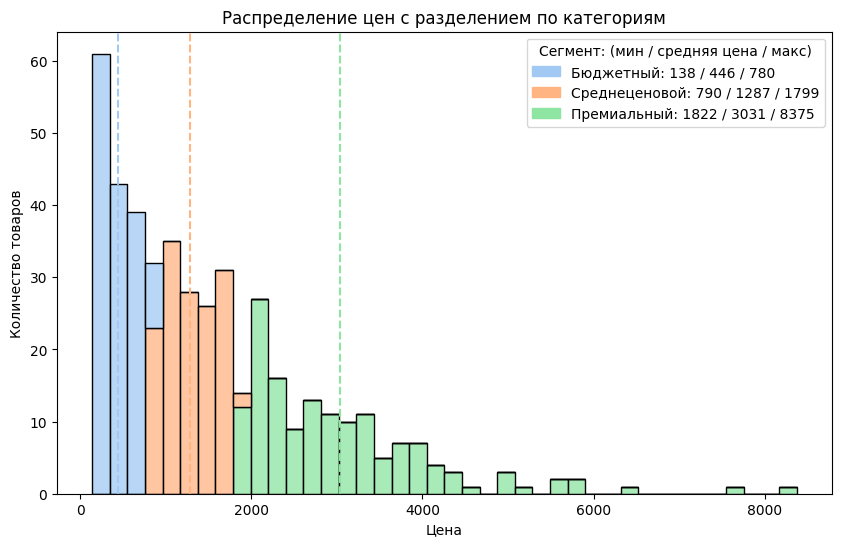

In [8]:
# Построение статистики и визуализация распределения цен

# Группировка по сегментам
stats = df.groupby("Сегмент", observed=True)["Цена"].agg(["min", "mean", "max"]).reset_index()  

# Формирование подписей для легенды
legend_labels = [
    f"{row['Сегмент']}: {row['min']:.0f} / {row['mean']:.0f} / {row['max']:.0f}"
    for _, row in stats.iterrows()
]  

# Пастельная палитра для сегментов
palette = sns.color_palette("pastel", n_colors=len(stats))  

# Сопоставление цветов сегментам
segment_colors = {segment: color for segment, color in zip(stats["Сегмент"], palette)}  

 # Размер графика
plt.figure(figsize=(10, 6)) 

# Гистограмма распределения цен
sns.histplot(
    data=df, x="Цена", hue="Сегмент", multiple="stack", palette=segment_colors, bins=40
)  

# Вертикальные линии средней цены
for _, row in stats.iterrows():
    plt.axvline(row["mean"], color=segment_colors[row["Сегмент"]], linestyle="--", linewidth=1.5)  

# Легенда с цветами и подписями
handles = [
    Patch(color=segment_colors[segment], label=label)
    for segment, label in zip(stats["Сегмент"], legend_labels)
]  

# Настройка легенды
plt.legend(handles=handles, title="Сегмент: (мин / средняя цена / макс)", loc="upper right")  

plt.title("Распределение цен с разделением по категориям")  # Заголовок графика
plt.xlabel("Цена")  # Подпись оси X
plt.ylabel("Количество товаров")  # Подпись оси Y
plt.show()


Видим характерное для e-commerce логнормальное распределение: плотность дешевых товаров больше, они занимают узкий ценовой диапазон, а плотность дорогих товаров меньше, они распределены в более широком диапазоне цен.

Определением популярных брендов займемся в подразделе "Анализ популярности", сначала проведем текстовый анализ.

##### 2.2. Популярные характеристики

В NLP имеется обширное количество задач и подходов для их решения.  
В нашем случае применим следующие:  
 - токенизация (разбиение на слова)
 - лемматизация (приведение слов к нормальной форме)
 - удаление стоп-слов
 - частотный анализ n-грамм

In [9]:
# Инициализация морфологического анализатора и стоп-слов
morph = pymorphy2.MorphAnalyzer()
stop_words = set(stopwords.words('russian'))

# Исходные данные
descriptions: List[str] = list(df['Описание'])

# Кастомные стоп-слова, не несущие дополнительного смысла для идентификации
custom_stopwords = {"тонер", "лицо", "кожа", "toner", "тоник", "с", "c"}
custom_stopwords = {morph.parse(word)[0].normal_form for word in custom_stopwords}

def preprocess_text_with_custom_stopwords(text: str) -> List[str]:
    """
    Лемматизация и фильтрация текста с учётом стандартных и кастомных стоп-слов.

    Параметры:
    -----------
    text : str
        Исходный текст для обработки.

    Возвращает:
    -----------
    List[str]
        Список лемматизированных и отфильтрованных токенов.
    """
    # Токенизация текста с приведением к нижнему регистру
    tokens = word_tokenize(text.lower())

    # Лемматизация и фильтрация токенов
    lemmatized_tokens = [
        morph.parse(word)[0].normal_form for word in tokens if word.isalnum()
    ]
    filtered_tokens = [
        word for word in lemmatized_tokens
        if word not in stop_words and word not in custom_stopwords
    ]
    return filtered_tokens

def find_popular_words_with_exclusions(
    corpus: List[str], ngram_size: int = 1, top_n: int = 10
) -> List[Tuple[Union[str, Tuple[str, ...]], int]]:
    """
    Поиск самых популярных слов или n-грамм в корпусе текста с исключением стоп-слов.

    Параметры:
    -----------
    corpus : List[str]
        Список текстов для анализа.
    ngram_size : int, optional
        Размер n-граммы (по умолчанию 1).
    top_n : int, optional
        Количество наиболее популярных слов или фраз для возврата (по умолчанию 10).

    Возвращает:
    -----------
    List[Tuple[Union[str, Tuple[str, ...]], int]]
        Список наиболее популярных слов или n-грамм с их частотой.
    """
    all_tokens: List[Union[str, Tuple[str, ...]]] = []

    # Преобразование каждого текста в токены и n-граммы
    for text in corpus:
        tokens = preprocess_text_with_custom_stopwords(text)
        if ngram_size > 1:
            all_tokens.extend(ngrams(tokens, ngram_size))
        else:
            all_tokens.extend(tokens)

    # Подсчёт частоты появления токенов или n-грамм
    counter = Counter(all_tokens)
    return counter.most_common(top_n)

# Поиск популярных слов, биграмм и триграмм
top_n = 15
popular_words = find_popular_words_with_exclusions(descriptions, ngram_size=1, top_n=100)
print("==Популярные слова==")
for word, freq in popular_words[:top_n]:
    print(f"{word}: {freq}")

==Популярные слова==
увлажнять: 166
экстракт: 129
кислота: 94
успокаивать: 71
гиалуронов: 50
коллаген: 45
восстанавливать: 38
центелла: 36
антивозрастной: 29
пептид: 28
азиатский: 27
skin: 27
отшелушивать: 25
collagen: 21
витамин: 20


In [10]:
top_n = 5
popular_bigrams = find_popular_words_with_exclusions(descriptions, ngram_size=2, top_n=100)
print("\n==Популярные биграммы==")
for phrase, freq in popular_bigrams[:top_n]:
    print(f"{' '.join(phrase)}: {freq}")

popular_trigrams = find_popular_words_with_exclusions(descriptions, ngram_size=3, top_n=100)
print("\n==Популярные триграммы==")
for phrase, freq in popular_trigrams[:top_n]:
    print(f"{' '.join(phrase)}: {freq}")



==Популярные биграммы==
гиалуронов кислота: 50
центелла азиатский: 27
успокаивать экстракт: 22
увлажнять гиалуронов: 16
чайный дерево: 15

==Популярные триграммы==
увлажнять гиалуронов кислота: 16
экстракт центелла азиатский: 10
birch juice moisturizing: 5
успокаивать экстракт центелла: 5
берёзовый сок birch: 4


Анализ определяет самые распространенные слова и словосочетания в названиях товаров. Можно углубить анализ, используя описание, характеристики, применение, состав товара и информация о бренде. Это задача для более углубленного парсинга, и наш подход будет работать на любых данных.  
Но для первичных оценок названия являются, вероятно, важнейшими данными, т.к. первое, на что обращает внимание покупатель - это слова в названии товара.

Классическая визуализация результатов - облако слов.

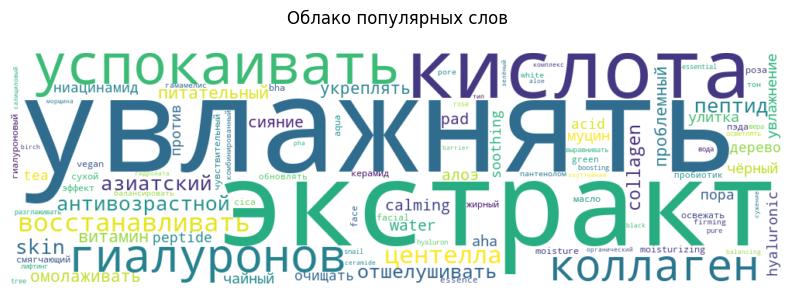

In [11]:
# Создание словаря с частотой слов
word_freq = {word: freq for word, freq in popular_words}

# Генерация облака слов
wordcloud = WordCloud(
    width=1000,
    height=300,
    background_color='white'
).generate_from_frequencies(word_freq)

# Настройка и отображение графика
plt.figure(figsize=(10, 5))  # Размер изображения
plt.imshow(wordcloud, interpolation='bilinear')  # Отображение облака слов с плавной интерполяцией
plt.axis('off')  # Убираем оси
plt.title('Облако популярных слов\n')
plt.show()  # Отображение результата

##### 2.3.	Анализ скидок

Здесь нужны простые арифметические расчеты. Включим в результаты общие характеристики для категорий.

In [12]:
# Фильтруем товары со скидкой
discounted = df[df['Скидка'] > 0]

# Группировка по категориям и брендам, подсчёт количества товаров со скидкой
brand_discounts = (
    discounted.groupby(['Сегмент', 'Название'], observed=True)
    .size()
    .reset_index(name='discount_count')
)

# Определяем бренд с максимальным количеством скидок для каждой категории
top_brands = (
    brand_discounts.loc[
        brand_discounts.groupby('Сегмент', observed=True)['discount_count'].idxmax()
    ]
)

# Общий подсчёт количества товаров в каждой категории
total_products_per_segment = (
    df.groupby('Сегмент', observed=True)
    .size()
    .rename("total_products")
    .reset_index()
)

# Подсчёт доли товаров со скидкой и среднего процента скидки
category_stats = (
    discounted.groupby('Сегмент', observed=True)
    .agg(
        total_discounted_products=('Скидка', 'size'),
        mean_discount=('Скидка', 'mean'),
    )
    .reset_index()
)

# Добавляем общее количество товаров
category_stats = category_stats.merge(
    total_products_per_segment,
    on='Сегмент',
    how='left'
)

# Рассчитываем долю товаров со скидкой
category_stats['discount_share'] = (
    category_stats['total_discounted_products'] / category_stats['total_products']
)

# Добавляем дополнительные показатели
additional_stats = (
    discounted.groupby(['Сегмент'], observed=True)
    .agg(
        mean_price=('Цена', 'mean'),
        total_reviews=('Отзывов', 'sum'),
        unique_names=('Название', 'nunique')
    )
    .reset_index()
)

# Объединяем дополнительные показатели с основными статистиками
category_stats = category_stats.merge(additional_stats, on='Сегмент', how='left')

# Добавляем бренд с максимальным количеством скидок
category_stats = category_stats.merge(
    top_brands[['Сегмент', 'Название']],
    on='Сегмент',
    how='left'
).rename(columns={'Название': 'top_brand'})

# Финальное переименование столбцов
category_stats = category_stats.rename(columns={
    'Сегмент': 'Сегмент',
    'total_discounted_products': 'Общее количество товаров со скидкой',
    'total_products': 'Общее количество товаров',
    'mean_discount': 'Средний процент скидки',
    'discount_share': 'Доля товаров со скидкой',
    'mean_price': 'Средняя цена',
    'total_reviews': 'Сумма отзывов',
    'unique_names': 'Уникальные названия',
    'top_brand': 'Бренд с наибольшим количеством скидок'
})

# Форматируем итоговые столбцы
category_stats['Средний процент скидки'] = category_stats['Средний процент скидки'].apply(lambda x: f"{x * 100:.1f}%")
category_stats['Доля товаров со скидкой'] = category_stats['Доля товаров со скидкой'].apply(lambda x: f"{x * 100:.1f}%")
category_stats['Средняя цена'] = category_stats['Средняя цена'].apply(lambda x: f"{x:.0f}")

# Настраиваем логический порядок столбцов
new_column_order = [
    'Сегмент',
    'Общее количество товаров',
    'Общее количество товаров со скидкой',
    'Доля товаров со скидкой',
    'Бренд с наибольшим количеством скидок',
    'Средний процент скидки',
    'Сумма отзывов',
    'Средняя цена',
    'Уникальные названия'
]

print(f"Доля товаров со скидкой: {len(df[df['Скидка'] > 0])/len(df[df['Цена'] > 0])*100:.1f}%\n")
print('Общая статистика по категориям, включая скидки')
category_stats[new_column_order]

Доля товаров со скидкой: 95.3%

Общая статистика по категориям, включая скидки


,Сегмент,Общее количество товаров,Общее количество товаров со скидкой,Доля товаров со скидкой,Бренд с наибольшим количеством скидок,Средний процент скидки,Сумма отзывов,Средняя цена,Уникальные названия
0,Бюджетный,152,146,96.1%,GRACE DAY,38.5%,3009,442,61
1,Среднеценовой,145,136,93.8%,FORENA,30.6%,1434,1284,75
2,Премиальный,147,141,95.9%,DR. HEDISON,24.5%,726,3060,65


Основные выводы:
 - большинство брендов предлагают скидки, что характерно для интернет-магазинов
 - скидки обычно значительные (в среднем ~ 25-40%)
 - чем дороже товар, тем процент скидок меньше
 - мы получили признак, коррелирующий с объемом продаж - количество отзывов (предположим, что отзывы о товаре будут оставлять те, кто его покупал)
 - чем дешевле товар, тем выше продажи, хотя ассортимент во всех категориях одинаковый

Визуальный анализ показывает, что на сайте нет товаров с низким рейтингом (очевидно, их снимают с продаж), поэтому в данном случае рейтинги товаров от 4.5 до 5 не очень информативны.

##### 2.4. Анализ популярности

In [13]:
# Вывод топ-N брендов по количеству отзывов в каждом сегменте
top_n = 5  # Количество брендов для отображения

top = (
    df.groupby(["Сегмент", "Название"], observed=True)
    .agg({'Цена': 'mean', 'Отзывов': 'sum'})
    .sort_values(by=['Сегмент', 'Отзывов'], ascending=[True, False])
    .groupby("Сегмент", observed=True)
    .head(top_n)
    .reset_index()
)  # Формирование топ-N брендов по сегментам

top['Цена'] = top['Цена'].apply(lambda x: f"{x:.0f}")

for segment in list(stats['Сегмент']):
    print(f'Top-{top_n} брендов в сегменте ={segment}=')
    display(top[top['Сегмент'] == segment].reset_index(drop=True))  # Отображение таблицы для текущего сегмента

Top-5 брендов в сегменте =Бюджетный=


,Сегмент,Название,Цена,Отзывов
0,Бюджетный,ARAVIA PROFESSIONAL,401,1849
1,Бюджетный,CONSLY,383,396
2,Бюджетный,LOREN COSMETIC,319,165
3,Бюджетный,MISCHA VIDYAEV,458,90
4,Бюджетный,SKINPHORIA,391,89


Top-5 брендов в сегменте =Среднеценовой=


,Сегмент,Название,Цена,Отзывов
0,Среднеценовой,FARMSTAY,1170,158
1,Среднеценовой,IT'S SKIN,1373,144
2,Среднеценовой,OK BEAUTY,977,113
3,Среднеценовой,HOLIKA HOLIKA,1153,112
4,Среднеценовой,NACIFIC,1434,71


Top-5 брендов в сегменте =Премиальный=


,Сегмент,Название,Цена,Отзывов
0,Премиальный,KUNDAL,1899,134
1,Премиальный,D`ALBA,2145,69
2,Премиальный,BELLFLOWER,2061,63
3,Премиальный,FRUDIA,2062,62
4,Премиальный,MISSHA,3178,54


In [14]:
# Вывод топ-N брендов по количеству отзывов в каждом сегменте

top_n = 5  # Количество товаров для отображения

# Сортировка и отбор уникальных товаров
top = (
    df.sort_values(by=['Сегмент', 'Отзывов'], ascending=[True, False])
    .drop_duplicates(subset=['Описание'])
    .groupby('Сегмент', observed=True)
    .head(top_n)
)

top['Цена'] = top['Цена'].apply(lambda x: f"{x:.0f}")

# Перебор сегментов и отображение топ-N товаров
for segment in stats['Сегмент']:
    print(f'Top-{top_n} товаров в сегменте = {segment} =')
    display(
        top[top['Сегмент'] == segment][
            ['Описание', 'Название', 'Отзывов', 'Цена']
        ].reset_index(drop=True)
    )


Top-5 товаров в сегменте = Бюджетный =


,Описание,Название,Отзывов,Цена
0,Тонер с салициловой кислотой Sebum Free Toner,ARAVIA PROFESSIONAL,799,349
1,Тонер омолаживающий с ниацинамидом Anti-Age Toner,ARAVIA PROFESSIONAL,765,356
2,Спрей увлажняющий с гиалуроновой кислотой Aqua...,ARAVIA PROFESSIONAL,285,498
3,Тонер-эссенция отшелушивающий с чайным деревом...,CONSLY,212,383
4,Тонер-эссенция укрепляющий с коллагеном и пепт...,CONSLY,184,383


Top-5 товаров в сегменте = Среднеценовой =


,Описание,Название,Отзывов,Цена
0,Тонер увлажняющий успокаивающий,OK BEAUTY,113,977
1,Тонер для лица Ac Mild,HOLIKA HOLIKA,73,1113
2,Тонер-бустер для лица укрепляющий с керамидами...,FARMSTAY,69,823
3,Тонер для лица успокаивающий с чайным деревом ...,BRING GREEN,66,1799
4,Тонер для лица с гиалуроновой кислотой V7 Hyal...,IT'S SKIN,57,1268


Top-5 товаров в сегменте = Премиальный =


,Описание,Название,Отзывов,Цена
0,"Тонер для лица с центеллой азиатской, пантенол...",KUNDAL,134,1899
1,Тонер для лица White Truffle First Aromatic Toner,D`ALBA,69,2145
2,"Тонер для лица антивозрастной со змеиным ядом,...",LIMONI,42,2381
3,Тонер для лица с прополисом Mr.Honey Propolis ...,BANILA CO,40,3271
4,Тонер для лица придающий сияние с идебеноном I...,BELLFLOWER,33,2061


In [15]:
# Выведем также абсолютный топ-10 товаров
df.sort_values(by='Отзывов', ascending=False)[['Описание', 'Название', 'Отзывов', 'Цена']].reset_index(drop=True).head(10)

,Описание,Название,Отзывов,Цена
0,Тонер с салициловой кислотой Sebum Free Toner,ARAVIA PROFESSIONAL,799,349.0
1,Тонер омолаживающий с ниацинамидом Anti-Age Toner,ARAVIA PROFESSIONAL,765,356.0
2,Тонер для лица увлажняющий с центеллой азиатск...,GASTON,354,NaN
3,Спрей увлажняющий с гиалуроновой кислотой Aqua...,ARAVIA PROFESSIONAL,285,498.0
4,Тонер-эссенция увлажняющий с гиалуроновой кисл...,CONSLY,283,NaN
5,Тонер-эссенция отшелушивающий с чайным деревом...,CONSLY,212,383.0
6,Тонер-эссенция укрепляющий с коллагеном и пепт...,CONSLY,184,383.0
7,Тонер-эссенция восстанавливающий с муцином ули...,CONSLY,172,NaN
8,Тонер для лица смягчающий для сухой и чувствит...,LOREN COSMETIC,165,319.0
9,"Тонер для лица с центеллой азиатской, пантенол...",KUNDAL,134,1899.0


В задании учитывается внимание к деталям. Сделаем чуть более подробный анализ.  
А именно, постараемся сформировать общую картину бренда - разброс цен, ассортимент продукции и т.п.

In [16]:
# Формирование статистики по товарам

top_n = 10

df_stats = (
    df[df.notna().all(axis=1)]  # Отбор строк без пропусков
    .groupby('Название')  # Группировка по названию товара
    .agg({
        'Цена': ['min', 'mean', 'max'],  # Минимальная, средняя и максимальная цены
        'Описание': ['count'],  # Количество товаров у бренда
        'Отзывов': ['sum'],  # Суммарное количество отзывов
        'Сегмент': 'nunique'  # Количество уникальных сегментов
    })
    .reset_index()
    .sort_values(by=('Отзывов', 'sum'), ascending=False)  # Сортировка по количеству отзывов (убывающий порядок)
    .head(top_n)
    .reset_index(drop=True)
)

# Расчет разницы между максимальной и минимальной ценой
df_stats[('Цена', 'diff')] = df_stats[('Цена', 'max')] - df_stats[('Цена', 'min')]

# Расчет процента изменения цен относительно средней цены
df_stats[('Цена', 'diff%')] = (
    (df_stats[('Цена', 'max')] - df_stats[('Цена', 'min')]) / df_stats[('Цена', 'mean')] * 100
)

# Применение форматирования для отображения данных в таблице
df_stats.style.format({
    ('Цена', 'min'): '{:.0f}',  # Форматирование минимальной цены без знаков после запятой
    ('Цена', 'mean'): '{:.0f}',  # Форматирование средней цены без знаков после запятой
    ('Цена', 'max'): '{:.0f}',  # Форматирование максимальной цены без знаков после запятой
    ('Цена', 'diff'): '{:.0f}',  # Форматирование разницы цен без знаков после запятой
    ('Цена', 'diff%'): '{:.0f}%'  # Форматирование процента изменения цен без знаков после запятой
})

Дополнительные выводы о характеристиках самых популярных брендов:
 - небольшой ассортимент товаров (от 1 до 5)
 - присутствие максимум в двух ценовых сегментах (не во всем диапазоне цен)
 - разброс цен (т.е. "ценовой размах" бренда) может быть разным: от 0 до 90% от средней цены
 - с точки зрения количества (не объема!) продаж, топ представляют бренды бюджетного/среднеценового сегмента

In [17]:
# Топ-3 товара для отчета
list(df.sort_values(by='Отзывов', ascending=False)['Описание'].reset_index(drop=True).head(3))

['Тонер с салициловой кислотой Sebum Free Toner',
 'Тонер омолаживающий с ниацинамидом Anti-Age Toner',
 'Тонер для лица увлажняющий с центеллой азиатской Cica Solution']

#### 3.	Подготовка отчета

Краткий обзор ценовых сегментов и позиционирования брендов в категории тонеров для жирной и нормальной кожи.
Выделяются три основных центовых сегмента (каждый ~ 150 наименований) в категории тонеров для жирной и нормальной кожи:
 - Бюджетный (цены от 130 до 780 руб), средняя цена ~ 450 руб
 - Среднеценовой (цены от 790 до 1800 руб), средняя цена ~ 1290 руб
 - Премиальный (цены от 1800 до 8400 руб), средняя цена ~ 3000 руб

Получены основые характеристики, часто встречающиеся в описании товаров (обобщенные, по убыванию популярности):
 - описательные характеристики:
   - увлажняющий, 
   - успокаивающий, 
   - восстанавливающий, 
   - антивозрастной,
   - отшелушивающий
 - состав: 
   - азиатская центелла, 
   - гиалуроновая кислота, 
   - экстракт, 
   - коллаген, 
   - чайное дерево,
   - пептид,
   - витамин

Общую картина по скидкам и акциям среди тонеров:
по полученным данным, большинство товаров (~ 95%) продается со скидкой, причем относительная скидка уменьшается при возрастании цены товара:
от ~ 40% средней скидки в бюджетном сегменте до ~ 25% скидки в пермиальном.

Ранее были получены подробные данные о популярности брендов и товаров, перечислим здесь топ-3 по количеству отзывов:
 - популярные бренды:
   - "ARAVIA PROFESSIONAL"
   - "CONSLY"
   - "FARMSTAY"
 - популярные товары:
   - "Тонер с салициловой кислотой Sebum Free Toner"
   - "Тонер омолаживающий с ниацинамидом Anti-Age Toner"
   - "Тонер для лица увлажняющий с центеллой азиатской Cica Solution"


#### 4.	Рекомендации

С учетом неполных данных, полученных с одного сайта популярного интернет-магазина, а также не имея информации о позиционировании компании-заказчика, можно дать следующие наиболее общие рекомендации.

Вопрос. Какие ценовые сегменты и характеристики могут быть востребованы в сегменте тонеров для жирной и нормальной кожи?  
Ответ. В сегменте тонеров для жирной и нормальной кожи все три выделенные ценовые категории имеют своего покупателя:
- Бюджетный сегмент: может быть наиболее востребованным за счёт доступности для широкой аудитории
- Среднеценовой сегмент: пользуется спросом у покупателей, готовых платить за качественные продукты с улучшенными характеристиками
- Премиальный сегмент: подходит для нишевого рынка с акцентом на эксклюзивные ингредиенты и премиум-упаковку

Вопрос. Какие особенности продуктов стоит учитывать при разработке аналогичной продукции?  
Ответ. При создании аналогичной продукции рекомендуется учитывать следующие ключевые аспекты:
- Функциональные свойства:
  - сделать акцент на увлажняющие, успокаивающие, восстанавливающие и отшелушивающие качества, которые особенно ценятся в уходе за жирной и нормальной кожей.
- Натуральные ингредиенты: 
  - подчеркивать натуральность продукта, включая такие популярные компоненты, как азиатская центелла, экстракты растений и чайное дерево.
- Инновационные технологии: 
  - использовать передовые биологические компоненты, такие как гиалуроновая кислота, коллаген, пептиды и витамины, которые эффективно решают задачи ухода и восстановления кожи.

Такой подход позволяет создать конкурентоспособный и востребованный продукт.

Вопрос. Какой подход к скидкам и акциям может помочь повысить конкурентоспособность?  
Ответ. Рекомендуется использовать гибкий подход к скидкам:
- Большинство товаров (~95%) продаётся со скидкой, поэтому поддержание акционных предложений важно для конкурентоспособности.
- Рекомендация: В бюджетном сегменте можно предлагать значительные скидки (~40%) для стимулирования объёмных продаж.
- В среднеценовом и премиальном сегментах разумно ограничить скидки (~25%), чтобы подчеркнуть ценность продукта.

Дополнительные рекомендации.
- Популярные бренды, как правило, сосредотачиваются на небольшом количестве товаров и на определенном диапазоне ценового сегмента (максимум 2 сегмента).
- У популярных брендов, как правило, размах цен небольшой: 0-10% от средней цены
- Привлекательными оказываются товары, где чаще встречаются названия характеристик и компонентов на русском языке


#### **Резюме**

Анализ рынка тонеров для жирной и нормальной кожи был проведён на основе данных интернет-магазина L'Etoile. Цель исследования — выявить основные тенденции, сформулировать рекомендации и оценить возможности развития инструментов сбора и анализа данных.

Основные результаты:  
- Для сбора данных использовались библиотеки BeautifulSoup и Selenium. Этот подход обеспечивает надёжный инструмент для парсинга данных, адаптируемый к любым аналогичным сайтам.
- Собраны ключевые характеристики товаров. Потенциально можно расширить сбор данных, включая изображения, рейтинги и подробные описания.
- Для анализа данных применялись библиотеки pandas и seaborn, что позволило проводить визуализацию и генерировать отчёты даже с небольшим объёмом исходных данных.
- Были выделены три ценовых сегмента (бюджетный, средний и премиальный) с характерными особенностями, что создаёт основу для анализа предпочтений покупателей.
- На основе текстового анализа названий товаров (nltk, pymorphy2) сформирован список популярных слов и словосочетаний, что может быть использовано для маркетинга.

Рекомендации для развития:  
- *Расширение источников данных*: создание парсеров для популярных сайтов интернет-магазинов с целью обзора более широкого диапазона информации.
- *Углубление сбора*: сбор всех данных с вложенных страниц, включая изображения и детальную информацию о составе товаров.
- *Текстовый и визуальный анализ*: использование методов обработки текста и анализа изображений (цвет, размер упаковки, состав).
- *Динамический анализ*: отслеживание изменения цен, акций и жизненного цикла товаров.
- *Мониторинг отраслевых тенденций*: регулярный анализ публичных данных о конкурентах и трендах в косметической отрасли.

Заключение:  
Проведённый анализ подтверждает, что даже с ограниченным объёмом данных можно получить ценные выводы. Использование современных библиотек Python делает этот процесс доступным, гибким и универсальным для дальнейших исследований.


